# Algoritmo Expectación-Maximización
Autor: Luis Eduardo Cerna

Código, implementación y edición: Edwin Bedolla

Es un proceso iterativo utilizado para encontrar el mejor valor de expectación. Se parte de una suposición inicial de las probabilidades _a priori_ de las clases y se busca maximizar la probabilidad de los puntos a pertencer a una u otra clase.

El algoritmo Expectación-Maximización (EM) se utiliza para encontrar máximos locales de probabilidad cuando los modelos contienen variables inferidas o [variables latentes](https://es.wikipedia.org/wiki/Variable_latente), así como datos y parámetos faltantes. El modelo parte de asumir que a cada punto del conjunto de datos conocidos le corresponde uno faltante. En particular, se busca maximizar la [probabilidad a posteriori](https://es.wikipedia.org/wiki/Probabilidad_a_posteriori) de que un punto pertenezca a una clase determinada.
La siguiente animación tomada de [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm#/media/File:EM_Clustering_of_Old_Faithful_data.gif) muestra la convergencia del modelo.

## Estructura general del algoritmo
El algoritmo EM asigna los puntos que deseamos clasificar a una clase en base a una probabilidad.

El algoritmo EM funciona iterativamente aplicando dos pasos:

1. **Expectación** (Paso E): Calcular los valores de expectación de cada punto, empleando las probabilidades _a priori_.
2. **Maximización** (Paso M): Calcular la probabilidad _a posteriori_ de que los puntos pertenezcan a una clase determinada. 

En el paso E se actualizan los valores de expectación mediane la función de probabilidad condicional de que los puntos pertenezcan a una clase:

$$Q(\theta|\theta^{(t)}) = E_{Z|X,\theta^{(t)}}[\log{L(\theta,X,Z)}]$$

En donde $X$ son los datos de observación, $Z$ son los valores faltantes y $\theta$ son las probabilidades _a priori_.

El paso M corresponde a maximizar la expresión anterior con respecto a los parámetros $\theta$, normalizando la expectación respecto a todas las posibles
clases que pueden resultar.

Si se aprender más sobre el algoritmo, fundamentación y derivación matemática, se recomiendan los siguientes artículos:

[Frank Dellaert, The Expectation Maximization Algorithm, 2002](https://www.cc.gatech.edu/~dellaert/em-paper.pdf).

[Sean Borman, The Expectation Maximization Algorithm A short tutorial](https://www.seanborman.com/publications/EM_algorithm.pdf)

[Chuong B Do & Serafim Batzoglou, What is the expectation maximization algorithm?, 2008](https://www.nature.com/articles/nbt1406)

## Algoritmo EM en Python

Para ejemplificar el uso del algoritmo EM en Python, se utilizará el famoso ejemplo del _experimento del volado con una moneda_. Para ello se utiliza el siguiente artículo como referencia, de _Nature_ publicado en _Computational Biology_: [Chuong B Do & Serafim Batzoglou](http://ai.stanford.edu/~chuongdo/papers/em_tutorial.pdf)
del cual se replicarán los resultados obtenidos.

### Caso de estudio: Experimento de volado de dos monedas diferentes con sesgos desconocidos
Supóngase que se tienen dos monedas $A$ y $B$, de sesgos desconocidos, $\theta_A$ y $\theta_B$ respectivamente. Esto significa que las monedas no tienen la misma probabilidad de que salga tanto cara como sello. Normalmente, una moneda es _justa_ lo que significa que tiene la misma probabilidad de que salga cara o sello,
con probabilidad $P(\text{cara}) = P(\text{sello}) = 0.5$.

Las probabilidades son entonces $\theta_A$ la probabilidad de obtener cara y $1-\theta_A$ de obtener sello para la moneda $A$, y similar para la moneda $B$. Nuestro objetivo es entonces conocer el sesgo $\theta = (\theta_A, \theta_B)$ de ambas. Para ello se repetirán los siguientes pasos 5 veces:

1. Escoger una moneda al azar (con igual probabilidad).
2. Realizar 10 lanzamientos con la moneda elegida.

Durante el experimento guardamos el número de caras del $i$-ésimo lanzamiento, $x_i$ y una etiqueta que identifique a dicha moneda, $z_i$. Buscamos entonces conocer el máximo valor de expectación para cada moneda.

Podemos estimar $\theta_A$ y $\theta_B$ de la siguiente manera:

$$\hat{\theta}_A = \frac{n_A}{N_A}$$

y

$$\hat{\theta}_B = \frac{n_B}{N_B}$$

en donde $n_A$ es el número de caras obtenidas utilizando la moneda A y $N_A$ es el número total de lanzamientos; similar para la moneda B.

Ahora, $\log{ P(x,z;\theta)}$ es la probabilidad de obtener cualquiera de los vectores en partícular, de la cuenta del número de caras $x$ de la moneza $z$, de manera que las expresiones anteriores resolverían el problema de manera muy simple. A esto se le conoce como **estimación de verosimilitud máxima** donde los valores de $\hat{\theta}_A$
y $\hat{\theta}_B$ maximizan $\log{ P(x,z;\theta)}$, que es lo que se busca originalmente.

Supóngase ahora que solamente se conoce la información del número de caras obtenidas, pero **no su identidad** de a qué moneda le pertenece cada lanzamiento de dicha información. Entonces la información faltante, $Z$, son si los lanzamientos pertenecen a la moneda A o B.

El objetivo es determinar los mismos sesgos $\theta_A$ y $\theta_B$, pero ahora sin la información de las monedas empleadas para realizar cada experimento de volado.
Esto complica el problema, pues ahora no se puede calcular $n_a$ o $n_b$ porque no se tiene esa información, y es aquí donde entra el algoritmo EM.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from sklearn.mixture import GaussianMixture

Se importa la función `binom` dado que el modelo de las monedas corresponde a un evento discreto donde solamente existen dos posibles resultados, cara o sello. Esta función permitirá calcular la probabilidad dado una [distribución binomial](https://en.wikipedia.org/wiki/Binomial_distribution) que es la distribución de probabilidad que se asume es la correcta en este caso.

### Caso 1. Cuando se tiene toda la información
Este es el caso cuando se conoce a qué moneda pertenece cada experimento, por lo que se debe reproducir exactamente el resultado del artículo.

In [20]:
# Número de experimentos
num_exp = 10.0
# Número de caras obtenidas por la moneda A
cara_a_real = np.array([9.0, 8.0, 7.0])
# Número de sellos obtenidos por la moneda A
sello_a_real = num_exp - cara_a_real
# Número de caras obtenidas por la moneda B
cara_b_real = np.array([5.0, 4.0])
# Número de sellos obtenidos por la moneda B
sello_b_real = num_exp - cara_b_real

In [21]:
print(cara_a_real.sum() / (cara_a_real.sum() + sello_a_real.sum()))
print(cara_b_real.sum() / (cara_b_real.sum() + sello_b_real.sum()))

0.8
0.45


Encontramos ahora los sesgos para la moneda A $\theta_A = 0.80$ y para la moneda B $\theta_B = 0.45$. Esto significa que, conociendo la información de a qué moneda pertenece cada experimento, empleando el principio de _máxima verosimilitud_ se sabe que las monedas no son _justas_, pues cada vez que se lance la moneda A saldrá cara un 80% de las veces; cada vez que se lance la moneda B saldrá cara un 45% de las veces.

### Caso 2. No se conoce toda la información
En este caso no se sabe a qué moneda pertenece cada experimento, por lo tanto se empleará el algoritmo EM. Primero, se tienen que tomar en cuenta **todos** los experimentos y registrar todas las veces que sale cara o sello, sin importar a qué moneda pertenece, pues esta es la información faltante.

In [22]:
# Número de caras que aparecen en los 5 experimentos
caras = np.array([5.0, 9.0, 8.0, 4.0, 7.0])
# Número de sellos que aparecen en los 5 experimentos
sellos = num_exp - caras
print(caras)
print(sellos)

[5. 9. 8. 4. 7.]
[5. 1. 2. 6. 3.]


Ahora se deben de calcular las verosimilitudes tomando en cuenta dos valores de sesgo aleatorios. Para la moneda A se propone $\theta_A = 0.6$ y para la moneda B $\theta_A = 0.5$, con estos sesgos se emplea ahora la función de distribución de probabilidad binomial y se muestra el resultado para los 5 experimentos.

In [23]:
a_prob = binom.pmf(caras, num_exp, 0.6)
b_prob = binom.pmf(caras, num_exp, 0.5)
likelihood_a = a_prob / (a_prob + b_prob)
likelihood_b = b_prob / (a_prob + b_prob)

In [24]:
print(likelihood_a)
print(likelihood_b)

[0.44914893 0.80498552 0.73346716 0.35215613 0.64721512]
[0.55085107 0.19501448 0.26653284 0.64784387 0.35278488]


Estas verosimilitudes encontradas son la probabilidad de que haya sido una moneda o la otra. Por ejemplo, los primeros valores son $P(x, A;\theta) \approx 0.45$ y $P(x, B;\theta) \approx 0.55$, lo que significa que el primer experimento de 5 caras y 5 sellos tiene una probabilidad del 45% de que haya sido hecho con la moneda A, y del 55% de que haya sido con la moneda B.
Este argumento se aplica para todos los valores mostrados, y este procedimiento se conoce como el **paso E**, descrito anteriormente. 

In [25]:
# Número de caras y sellos para cada experimento, considerando las nuevas verosimilitudes
nuevas_caras_a = caras * likelihood_a
nuevos_sellos_a = sellos * likelihood_a
print("Total de caras para moneda A: {}".format(nuevas_caras_a.sum()))
print("Total de sellos para moneda A: {}".format(nuevos_sellos_a.sum()))
a_sesgo = nuevas_caras_a.sum() / (nuevas_caras_a.sum() + nuevos_sellos_a.sum())
print("Nueva sesgo para la moneda A: {}".format(a_sesgo))

Total de caras para moneda A: 21.297481896347225
Total de sellos para moneda A: 8.572246614530176
Nueva sesgo para la moneda A: 0.7130122354005162


Este paso corresponde al **paso M** donde se maximiza la probabilidad. Ahora se encuentra un nuevo sesgo $\hat{\theta}_A \approx 0.72$ para la moneda A, habiendo aplicado un paso iterativo del algoritmo EM completo. Primero se realizó el _paso E_ y ahora en este paso se encuentra un valor de sesgo más cercano al real de la moneda A.

In [26]:
# Número de caras y sellos para cada experimento, considerando las nuevas verosimilitudes
nuevas_caras_b = caras * likelihood_b
nuevos_sellos_b = sellos * likelihood_b
print("Total de caras para moneda B: {}".format(nuevas_caras_b.sum()))
print("Total de sellos para moneda B: {}".format(nuevos_sellos_b.sum()))
b_sesgo = nuevas_caras_b.sum() / (nuevas_caras_b.sum() + nuevos_sellos_b.sum())
print("Nueva probabilidad de que sea la moneda B: {}".format(b_sesgo))

Total de caras para moneda B: 11.702518103652775
Total de sellos para moneda B: 8.427753385469822
Nueva probabilidad de que sea la moneda B: 0.5813393083136627


De la misma forma para la moneda B, ahora se encuentra un nuevo sesgo $\hat{\theta}_B \approx 0.52$, el cual todavía no se acerca como tal al valor real pero se espera que converja conforme se repita cada ciclo EM del algoritmo.

In [27]:
# Para reproducir los resultados del algoritmo, se repite 10 veces los pasos EM
for _ in range(10):
    # Paso E
    a_prob = binom.pmf(caras, num_exp, a_sesgo)
    b_prob = binom.pmf(caras, num_exp, b_sesgo)
    likelihood_a = a_prob / (a_prob + b_prob)
    likelihood_b = b_prob / (a_prob + b_prob)
    # Paso M
    nuevas_caras_a = caras * likelihood_a
    nuevos_sellos_a = sellos * likelihood_a
    a_sesgo = nuevas_caras_a.sum() / (nuevas_caras_a.sum() + nuevos_sellos_a.sum())
    nuevas_caras_b = caras * likelihood_b
    nuevos_sellos_b = sellos * likelihood_b
    b_sesgo = nuevas_caras_b.sum() / (nuevas_caras_b.sum() + nuevos_sellos_b.sum())

In [28]:
print("Sesgo aproximado de la moneda A: {:.2f}".format(a_sesgo))
print("Sesgo aproximado de la moneda B: {:.2f}".format(b_sesgo))

Sesgo aproximado de la moneda A: 0.80
Sesgo aproximado de la moneda B: 0.52


Habiendo repetido 10 veces el ciclo iterativo del algoritmo EM, los sesgos convergen a $\hat{\theta}_A \approx 0.80$ y $\hat{\theta}_A \approx 0.52$, para la moneda A y B respectivamente. Esto es exactamente el resultado obtenido en el artículo de referencia, pero además corresponde con el resultado obtenido en el _caso 1_ cuando se tenía toda la información, dentro de un rango de error.

El valor del sesgo de la moneda A es el correcto, pero el valor del sesgo de la moneda B está cerca pero no es el indicado. Aunque se empleen más ciclos iterativos del algoritmo EM ya no va a cambiar el resultado, es una de las propiedades fundamentales de este algoritmo y es que **siempre coverge al resultado óptimo**.

## Modelos de Mezclas, clasificación no supervisada y el algoritmo EM
Retomando el ejemplo anterior de los experimentos de las monedas no se conocía la información de las monedas y cuál de éstas había
generado los experimentos. Una forma alternativa de visualizar este hecho es que existen **dos clases**, la clase _moneda A_ y la 
clase _moneda B_ y se quieren separar los experimentos hacia cada una. En este caso, el sesgo de cada moneda ya no es tan importante,
se sigue calculando como parte del algoritmo EM pero en realidad ahora es más interesante poder separar los datos. Esta separación
de clases es lo que se está logrando con este algoritmo, ¿pero de qué forma?

En el ejemplo pasado se asumió que la densidad de probabilidad de que lo que provenían los datos era una distribución binomial, un
hecho que se asumió por la naturaleza del conjunto de datos, sin embargo esta es una hipótesis que no siempre se puede emplear dado
que no todos los eventos siguen naturalmente una distribución binomial.

### El Teorema del Límite Central y la distribución normal
Las diferentes variaciones del [Teorema del Límite Central](https://en.wikipedia.org/wiki/Central_limit_theorem) demuestran lo mismo,
para diferentes circunstancias, esto es que

> Cuando variables aleatorias independientes son sumadas, su suma normalizada siempre tiene a la distribución normal.

Este teorema es fundamental en la teoría de la probabilidad dado que en muchas ocasiones se puede emplear la [distribución normal](https://en.wikipedia.org/wiki/Normal_distribution)
para modelar otras distribuciones de probabilidad, sobre todo cuando se tienen suficientes datos.

En particular, tomando el ejemplo desarrollado anteriormente, la distribución binomial se aproxima a la distribución normal cuando el
número de datos es grande, apelando al [Teorema de de Moivre-Laplace](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem), por
lo que emplear la distribución normal es correcto solamente cuando se tiene la cantidad adecuada de datos.

### Modelos de mezclas
Supóngase que no se conoce nada sobre la probabilidad en el ejemplo anterior de los experimentos con las monedas, y no solamente se realizaron
5 experimentos sino que se realizaron 500. Apelando al _Teorema del Límite Central_ se puede emplear una distribución normal sin pérdida
de generalidad y se obtendrían datos muy semejantes, sino es que idénticos.

Ahora supóngase que se trabaja con un conjunto de datos $X = {x_1, \cdots, x_n}$ que puede ser _multimodal_ donde se pueden encontrar varios
valores parecidos a la _media aritmética_, _desviación estándar_, entre otras cantidades. En este caso se tendría que emplear una _combinación_
de varias distribuciones normales para tratar de encontrar la descripción correcta del conjunto de datos $X$. Pero la pregunta inevitable es
¿cuántas distribuciones normales se deben emplear para describir el conjunto de datos $X$ de la mejor forma posible?

Para ejemplificar este modelo se presenta un caso de estudio, pero se remite a la persona interesada en revisar las referencias al final de este
documento.

## Caso de estudio. Generar datos nuevos a partir de un conjunto de datos.
Este ejemplo fue tomado de [este libro](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html) y modificado para este documento.

El propósito es aprender las características de un conjunto de datos, y con estas características generar más datos que puedan ser de ayuda para cualquier tipo de estimador, clasificador, entre otros.

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

El conjunto de datos son imágenes de dígitos escritos a mano, son 1797 instancias (o imágenes) de 8x8 pixeles de ancho y alto. A continuación se grafican 100 de estas imágenes para observar el conjunto de datos con el que se está trabajando.

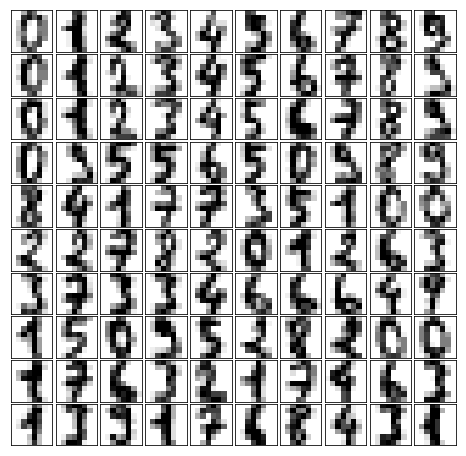

In [32]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

plot_digits(digits.data)

La idea es utilizar este conjunto de datos, aprender las características más importantes, y generar nuevos "número hechos a mano" mediante **modelos de mezclas**, asumiendo que las distribuciones son todas normales.
Para este se emplea `scikit-learn` y el algoritmo que ya tiene implementado. Sin embargo, antes de continuar se debe reducir la dimensión del conjunto de datos dado que las distribuciones normales en dimensiones superiores tienen problemas de convergencia por la _maldición de la dimensionalidad_.

In [33]:
from sklearn.decomposition import PCA
# Mantener el 99% de la información original
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

La dimensión se ha reducido a 41, lo cual es mejor que las 64 que se tenían originalmente y sobre todo no se pierde más que ql 1% de la información original del conjunto de datos. Con esto se puede emplear el modelo de mezclas con distribución normal, empleando 110 diferentes distribuciones normales. Este número proviene de emplear un criterio de aprendizaje que se puede leer con más detalle en el libro original. Aquí solamente se reproduce el resultado, verificando que el método haya convergido.

In [37]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


Dado que se tienen que **maximixar** la probabilidad _a posteriori_ de que este conjunto de datos efectivamente pueda ser descrito como un modelo de mezclas de distribuciones, la implementación de `scikit-learn` emplea el algoritmo EM para encontrar el máximo. Este es el estándar para realizar este tipo de algoritmos dado que es muy eficiente y robusto.

In [41]:
data_new, etiquetas = gmm.sample(100)
data_new.shape

(100, 41)

Ahora se tienen 100 "nuevos dígitos" creados de forma artificial, habiendo aprendido las características del conjunto de datos, maximizando la probabilidad _a posteriori_ mediante el algoritmo EM y muestrando los datos utilizando el modelo de mezclas de 110 distribuciones normales diferentes. Se pueden graficar estos "nuevos dígitos" para ver el resultado.

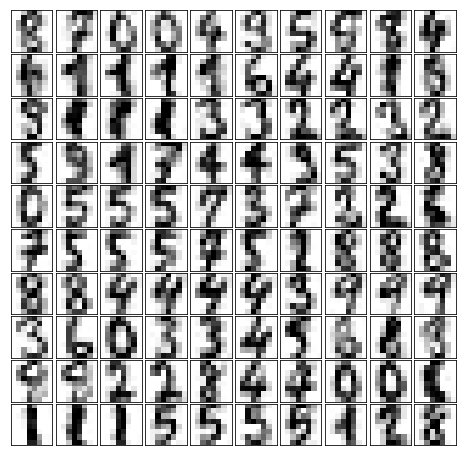

In [42]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

Claramente no son los mejores dígitos, pero así están en el conjunto de datos original. Lo impactante y más importante de todos es que estos datos fueron creados de forma artificial, sin necesidad de solicitar que más personas realicen los dígitos a mano. Los _modelos de mezclas_ son muy útiles porque pueden aprender una distribución de probabilidad (mediante la combinación de muchas distribuciones normales).

## Referencias

1. El [Criterio de Información de Akaike](https://en.wikipedia.org/wiki/Akaike_information_criterion) da el resultado óptimo de cuántas distribuciones deben emplearse en el modelo de mezclas.

2. [Tutorial de modelos de mezclas](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch20.pdf). Este documento tiene un desarrollo del modelo de mezclas normales, junto con aplicaciones e implementaciones en el lenguaje de programación R.

3. [Clase de Modelos de Mezclas de la Universidad de Toronto](http://www.cs.toronto.edu/~rgrosse/csc321/mixture_models.pdf). Este documento corresponde a una clase completa de los modelos de mezclas, donde se hace todo el desarrollo riguroso matemático de los modelos de mezclas normales, así como emplear el algoritmo EM para encontrar el resultado óptimo.

4. [Documentación de Modelos de Mezclas de `scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.sample)